<a href="https://colab.research.google.com/github/nkharlamova/ML/blob/main/HW_18_RNN_gru_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK: To perform classification on the IMDB dataset using RNN.**

**Dataset: https://keras.io/api/datasets/imdb/**

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout
from keras.optimizers import Adam

import matplotlib.pyplot as plt

**Saving some parameters for the text.**

In [ ]:
# Збережемо деякі параметри для тексту
max_features = 20000
maxlen = 200

**Loading the IMDB data.**

In [ ]:
# Завантажуємо дані IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 1s 0us/step


**Padding samples to the same length.**

In [ ]:
# Приводимо наші зразки до однакової довжини
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)

Train shape:  (25000, 200)
Test shape:  (25000, 200)


**Creating an RNN model and compiling it.**

In [ ]:
# Створюємо модель RNN
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(GRU(32, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation="sigmoid"))

# Компіляція моделі
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

**Training of the RNN model.**

In [ ]:
# Тренуємо модель
epochs = 5
batch_size=128

history = model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 87s 423ms/step - loss: 0.5331 - accuracy: 0.7175 - val_loss: 0.3872 - val_accuracy: 0.8288
Epoch 2/5
196/196 [==============================] - 75s 386ms/step - loss: 0.3083 - accuracy: 0.8779 - val_loss: 0.3444 - val_accuracy: 0.8558
Epoch 3/5
196/196 [==============================] - 76s 387ms/step - loss: 0.2282 - accuracy: 0.9142 - val_loss: 0.3637 - val_accuracy: 0.8616
Epoch 4/5
196/196 [==============================] - 81s 416ms/step - loss: 0.1747 - accuracy: 0.9374 - val_loss: 0.3542 - val_accuracy: 0.8614
Epoch 5/5
196/196 [==============================] - 75s 379ms/step - loss: 0.1356 - accuracy: 0.9522 - val_loss: 0.3617 - val_accuracy: 0.8639


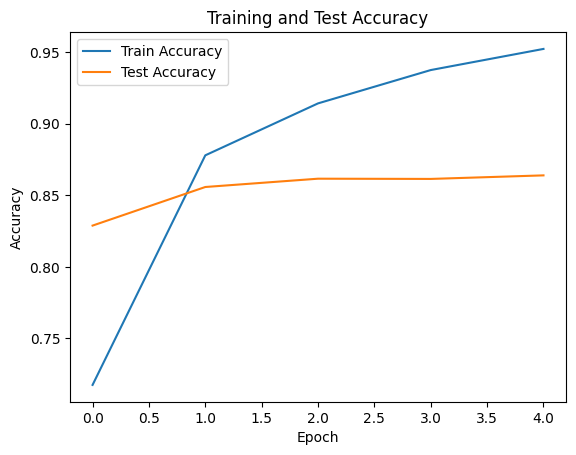

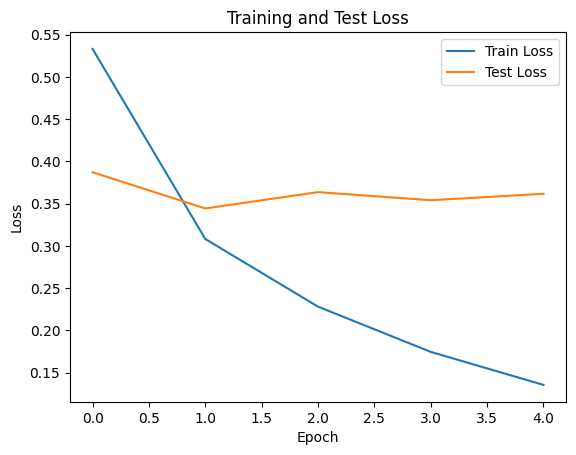

In [ ]:
# Fetching the training and validation accuracy history of the model:
# Отримуємо історію точності моделі навчання та валідації
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

# Fetching the training and validation loss history:
# Отримуємо історію втрат навчання та валідації
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Accuracy plot
# Графік для точності
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(val_accuracy, label="Test Accuracy")
plt.title("Training and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# Loss plot
# Графік для втрат
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Test Loss")
plt.title("Training and Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print("Accuracy on the test data set: {:.2f}%".format(val_accuracy * 100))
print("Loss on the test data set: {:.4f}".format(val_loss))

782/782 [==============================] - 25s 32ms/step - loss: 0.3617 - accuracy: 0.8639
Accuracy on the test data set: 86.39%
Loss on the test data set: 0.3617


**Here we can see slightly better results on the training data compared to LSTM, but based on validation scores, it seems that the model is not stable and is likely overfitting.**

In [ ]:
# Тут бачимо трохи кращий результат на тренувальних даних (ніж на lstm),
# але з валідаційних оцінок схоже, що модель не стабільна і скоріш за все перенавчається.